In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
import statsmodels.api as sm
import sys; sys.path.append("..")
from trader.data.univ import Universe

## Ways to improve
    - Use historical universe (top 50% liquidity every quarter)
    - Make sure data is normalised etc, read up
    - Explore the data etc etc
    - Remove outliers
    - Use GLS instead of OLS (maybe just weighted)

In [165]:
metrics = pd.read_csv("big.csv")

In [166]:
univ = Universe()

In [167]:
df = {}
for symbol, grp in metrics.groupby("Symbol"):
    grp = grp.pivot(index="Time", columns = "Metric", values="Value")
    grp.index = pd.to_datetime(grp.index)
    grp = grp.last("3Y")
    facs = pd.DataFrame(index=grp.index)
    if symbol in ["btc"]:
        facs["TAAR"] = grp.active_addresses.rolling("7D").mean() / grp.transactions_mean.rolling("7D").mean()
        facs["NVT"] = np.log(grp.mktcap) / np.log(grp.transactions_sum.rolling("7D").mean())
    else:
        try:
            facs["TAAR"] = grp.active_addresses.rolling("7D").mean() / grp.transfers_mean.rolling("7D").mean()
        except AttributeError as e:
            print(symbol, e)
        try:
            facs["NVT"] = np.log(grp.mktcap) / np.log(grp.transfers_sum.rolling("7D").mean())
        except AttributeError as e:
            print(symbol, e)
    facs["Metcalfe"] = np.log(grp.mktcap) / np.log(grp.active_addresses.rolling("7D").mean())
    facs["LogMktCap"] = np.log(grp.mktcap)
    facs["MktCap"] = grp.mktcap
    facs["Price"] = grp.price
    df[symbol.title()] = facs

C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\panda

APE 'DataFrame' object has no attribute 'transfers_mean'
APE 'DataFrame' object has no attribute 'transfers_sum'


C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\panda

MANA 'DataFrame' object has no attribute 'transfers_mean'
MANA 'DataFrame' object has no attribute 'transfers_sum'
OMG 'DataFrame' object has no attribute 'transfers_mean'
OMG 'DataFrame' object has no attribute 'transfers_sum'


C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\panda

SAND 'DataFrame' object has no attribute 'transfers_mean'
SAND 'DataFrame' object has no attribute 'transfers_sum'
SHIB 'DataFrame' object has no attribute 'transfers_mean'
SHIB 'DataFrame' object has no attribute 'transfers_sum'


C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\panda

stETH 'DataFrame' object has no attribute 'transfers_mean'
stETH 'DataFrame' object has no attribute 'transfers_sum'


C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Phili\anaconda3\envs\Trader\lib\site-packages\panda

In [168]:
df = pd.concat(df, axis=1).swaplevel(axis=1)#.stack()#.stack().reset_index()
#df.columns = ["Time", "Metric", "Symbol", "Value"]
#df = df.groupby([pd.Grouper(freq="W-Wed", key="Time"), "Symbol", "Metric"]).mean().reset_index()
#df = df.set_index(["Time", "Symbol", "Metric"]).Value.unstack()

In [169]:
freq = "W-Mon"

In [170]:
df.head()

,TAAR,NVT,Metcalfe,LogMktCap,MktCap,Price,TAAR,NVT,Metcalfe,LogMktCap,...,Metcalfe,LogMktCap,MktCap,Price,TAAR,NVT,Metcalfe,LogMktCap,MktCap,Price
,Aave,Aave,Aave,Aave,Aave,Aave,Abt,Abt,Abt,Abt,...,Steth,Steth,Steth,Steth,Wnxm,Wnxm,Wnxm,Wnxm,Wnxm,Wnxm
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.005083,1.273116,4.423619,16.206202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.003784,1.249371,4.495742,16.172589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.003604,1.273081,4.673552,16.197297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.003788,1.282156,4.674889,16.238313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.004026,1.292799,4.714818,16.220945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
returns = df["Price"].groupby(pd.Grouper(freq=freq)).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1)
metcalfe = df["Metcalfe"].groupby(pd.Grouper(freq=freq)).last()
mktcap = df["MktCap"].groupby(pd.Grouper(freq=freq)).last()
logmktcap = df["LogMktCap"].groupby(pd.Grouper(freq=freq)).last()
taar = df["TAAR"].groupby(pd.Grouper(freq=freq)).last()
nvt = df["NVT"].groupby(pd.Grouper(freq=freq)).last()
lowvolatility = 1/df.Price.pct_change().ewm(span=30, min_periods=10).std().groupby(pd.Grouper(freq=freq)).last()
momentum = df.Price.pct_change().rolling(30).mean().groupby(pd.Grouper(freq=freq)).last()

In [240]:
nvt.replace([-np.inf, np.inf], np.nan).sub(df.mean(axis=1), axis=0)

,Aave,Abt,Ampl,Ant,Armor,Badger,Bal,Band,Bat,Bix,...,Wax,Wbtc,Weth,Wtc,Wabi,Yam,Yfi,Zrx,Susd,Wnxm
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
def scale(df):
    #df = df.rank(axis=1)
    scaled = {}
    df = df.replace([-np.inf, np.inf], np.nan)
    for idx, row in df.iterrows():
        row = row.dropna()
        row -= row.mean()
        row /= row.std()
        scaled[idx] = row
    return pd.concat(scaled).unstack()
    #df = df.replace([-np.inf, np.inf], np.nan)
    #return df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

In [257]:
scale(nvt)

,Aave,Abt,Ampl,Ant,Armor,Badger,Bal,Band,Bat,Bix,...,Utk,Veri,Wabi,Wax,Wbtc,Wnxm,Wtc,Yam,Yfi,Zrx
2020-01-06,NaN,-0.091887,0.372843,0.209651,NaN,NaN,NaN,-0.229015,-0.393945,0.364040,...,-0.738700,1.644890,-0.182224,1.792084,5.212475,NaN,-0.345610,NaN,NaN,-0.210485
2020-01-13,NaN,-0.399292,0.254636,-0.026866,NaN,NaN,NaN,-0.182902,-0.443119,-0.112361,...,-0.617523,2.345920,-0.233210,0.572934,4.908081,NaN,-0.344711,NaN,NaN,-0.338636
2020-01-20,NaN,-0.348448,0.776639,0.284433,NaN,NaN,NaN,0.381913,-0.404679,0.035040,...,-0.613600,0.862138,-0.282659,1.534820,4.522056,NaN,-0.610777,NaN,NaN,-0.280423
2020-01-27,NaN,-0.217260,0.420065,0.209311,NaN,NaN,NaN,0.305634,-0.233570,-0.077376,...,-0.752985,1.343316,-0.231187,0.688994,4.822581,NaN,-0.491903,NaN,NaN,-0.384891
2020-02-03,NaN,-0.242958,0.409769,0.209420,NaN,NaN,NaN,-0.079086,-0.272145,-0.053049,...,-0.672271,1.808462,-0.241472,0.500457,3.965434,NaN,0.132533,NaN,NaN,-0.420797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.371260,-0.649809,-0.436202,1.455289,-0.943353,-0.449620,-0.149382,-0.126008,-0.439529,3.057775,...,-0.262814,2.248643,-0.327571,1.530102,1.664740,-0.038156,-0.227014,1.529619,1.987867,-0.573677
2022-08-08,0.406060,-0.902052,-0.354169,1.781504,-0.910845,-0.289802,-0.064374,-0.061700,-0.470556,1.244848,...,-0.611809,2.256504,-0.498374,0.291206,1.656937,0.404192,0.633305,2.227590,2.428206,-0.399080
2022-08-15,0.267240,-0.709695,-0.382977,1.599356,-0.759085,-0.360027,-0.264083,-0.497893,-0.427737,1.495950,...,-0.230544,1.460322,-0.092465,0.880371,1.056078,0.206015,2.058368,1.726414,2.008724,-0.406710
2022-08-22,0.104726,-0.450777,-0.298334,0.748259,-0.611483,-0.229528,-0.134693,-0.193351,-0.305881,NaN,...,-0.240626,0.992497,-0.182174,0.192281,0.701219,-0.187392,2.656826,1.097857,1.251255,-0.282389


In [258]:
factors = {}
factors["Value"] = scale(scale(nvt) + scale(metcalfe))
factors["Quality"] = scale(taar)
factors["Momentum"] = scale(momentum)
factors["LowVolatility"] = scale(lowvolatility)
factors["Size"] = scale(logmktcap)
factors["Returns"] = returns
factors = {k : v.last("2Y") for k, v in factors.items()}


factors = pd.concat(factors, axis=1).stack().stack().reset_index()
factors.columns = ["Time", "Symbol", "Factor", "Value"]

<AxesSubplot:xlabel='Time'>

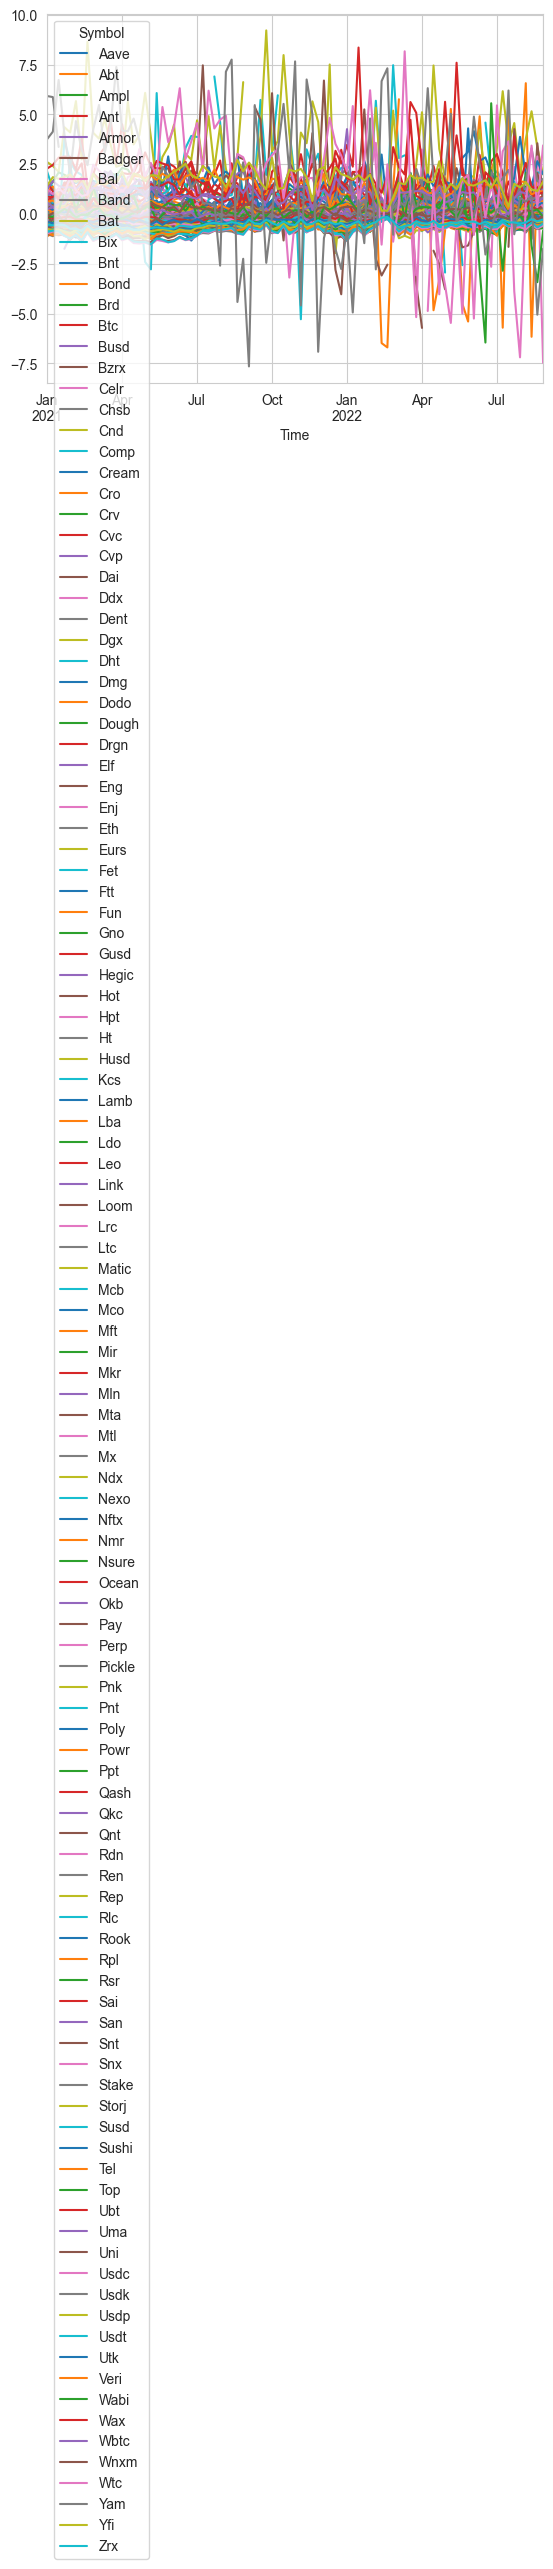

In [265]:
factors[factors.Factor == "Value"].pivot(index="Time", columns="Symbol", values="Value").plot()

In [266]:
hm = factors.set_index(["Time", "Symbol", "Factor"]).Value.unstack().dropna()
iqr = hm.Returns.quantile(0.75) - hm.Returns.quantile(0.25)
hm = hm[(hm.Returns > hm.Returns.quantile(0.25) - iqr*1.5) & (hm.Returns < hm.Returns.quantile(0.75) + iqr*1.5)]
hm = hm.stack().reset_index().rename(columns = {0 : "Value"})

In [267]:
coefs = {}
resids = {}
tvals = {}
for date, grp in hm.groupby("Time"):
    grp = grp.pivot(index="Symbol", columns = "Factor", values = "Value")
    y = grp["Returns"]
    X = grp[grp.columns.difference(["Returns"])].dropna()
    #X = X.join(sectors, how="left").dropna()
    y, X = y.align(X, join="inner")
    print(X.shape)
    X["Market"] = 1.0
    res = sm.OLS(y, X).fit()
    #w = np.diag(res.normalized_cov_params)[:, np.newaxis].reshape(-1,1).T#pd.DataFrame(, index=res.params.index)    
    #res = sm.WLS(y, X, 1/w)
    #cov = res.normalized_cov_params
    
    coefs[date] = res.params
    resids[date] = res.resid
    tvals[date] = res.tvalues

(88, 5)
(100, 5)
(79, 5)
(105, 5)
(89, 5)
(88, 5)
(93, 5)
(95, 5)
(109, 5)
(101, 5)
(99, 5)
(111, 5)
(106, 5)
(105, 5)
(110, 5)
(112, 5)
(114, 5)
(108, 5)
(108, 5)
(108, 5)
(59, 5)
(116, 5)
(114, 5)
(113, 5)
(92, 5)
(110, 5)
(112, 5)
(115, 5)
(114, 5)
(101, 5)
(111, 5)
(96, 5)
(114, 5)
(107, 5)
(116, 5)
(107, 5)
(113, 5)
(116, 5)
(110, 5)
(112, 5)
(116, 5)
(112, 5)
(112, 5)
(112, 5)
(107, 5)
(113, 5)
(115, 5)
(111, 5)
(111, 5)
(112, 5)
(117, 5)
(112, 5)
(112, 5)
(114, 5)
(110, 5)
(101, 5)
(113, 5)
(113, 5)
(116, 5)
(113, 5)
(112, 5)
(114, 5)
(114, 5)
(111, 5)
(107, 5)
(115, 5)
(114, 5)
(114, 5)
(111, 5)
(114, 5)
(110, 5)
(106, 5)
(110, 5)
(111, 5)
(115, 5)
(79, 5)
(113, 5)
(112, 5)
(112, 5)
(114, 5)
(97, 5)
(112, 5)
(109, 5)
(110, 5)
(112, 5)
(112, 5)
(111, 5)


In [268]:
X

Factor,LowVolatility,Momentum,Quality,Size,Value,Market
Symbol,,,,,,
Aave,-0.088736,0.040712,-0.121624,0.915056,0.159063,1.0
Abt,-0.088736,2.709939,-0.121818,-0.646136,-0.325590,1.0
Ampl,-0.088736,-1.172153,-0.121815,-0.184798,-0.241539,1.0
Ant,-0.088736,-0.235567,-0.121797,-0.099837,0.896385,1.0
Armor,-0.088736,-0.599424,-0.121818,-1.435071,-0.557399,1.0
...,...,...,...,...,...,...
Wnxm,-0.088736,0.283216,-0.121811,-0.423435,-0.127342,1.0
Wtc,-0.088736,0.007470,-0.121817,-0.486364,3.443032,1.0
Yam,-0.088736,0.161723,-0.121818,-1.462500,-1.733679,1.0


In [269]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.004
Date:                Thu, 01 Sep 2022   Prob (F-statistic):              0.419
Time:                        19:06:23   Log-Likelihood:                 154.13
No. Observations:                 111   AIC:                            -296.3
Df Residuals:                     105   BIC:                            -280.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LowVolatility  7.911e+05   1.85e+06      0.427      0.670   -2.88e+06    4.46e+06
Momentum          0.0052      0.008      0.655      0.514      -0.011       0.021
Quality          -0.0058      0.006     -0.942      0.348      -0.018       0.006
Size              0.0111      0.007      1.621      0.108      -0.002       0.025
Value            -0.0049      0.006     -0.819      0.414      -0.017       0.007
Market          7.02e+04   1.64e+05      0.427      0.670   -2.56e+05    3.96e+05
==============================================================================
Omnibus:                       24.587   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.577
Skew:                          -0.445   Prob(JB):                     2.68e-29
Kurtosis:                       8.259   Cond. No.                     3.74e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

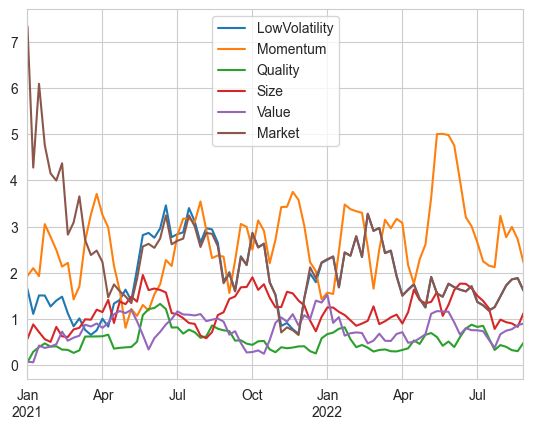

In [270]:
pd.DataFrame(tvals).T.abs().rolling("30D").mean().plot()

<AxesSubplot:>

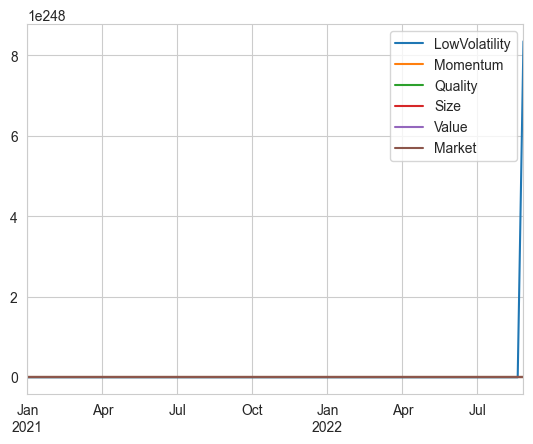

In [271]:
(1.0 + pd.DataFrame(coefs).T).cumprod().plot()

<AxesSubplot:>

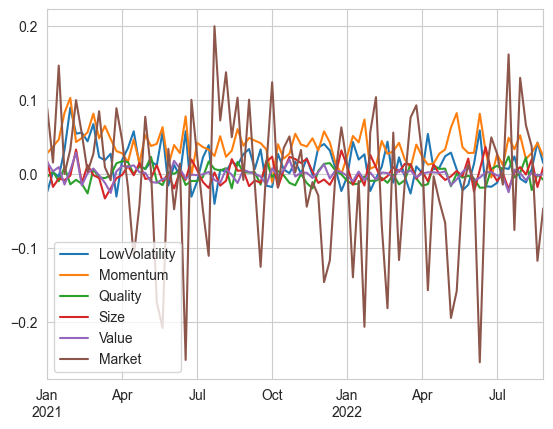

In [218]:
pd.DataFrame(coefs).T.plot()

<AxesSubplot:>

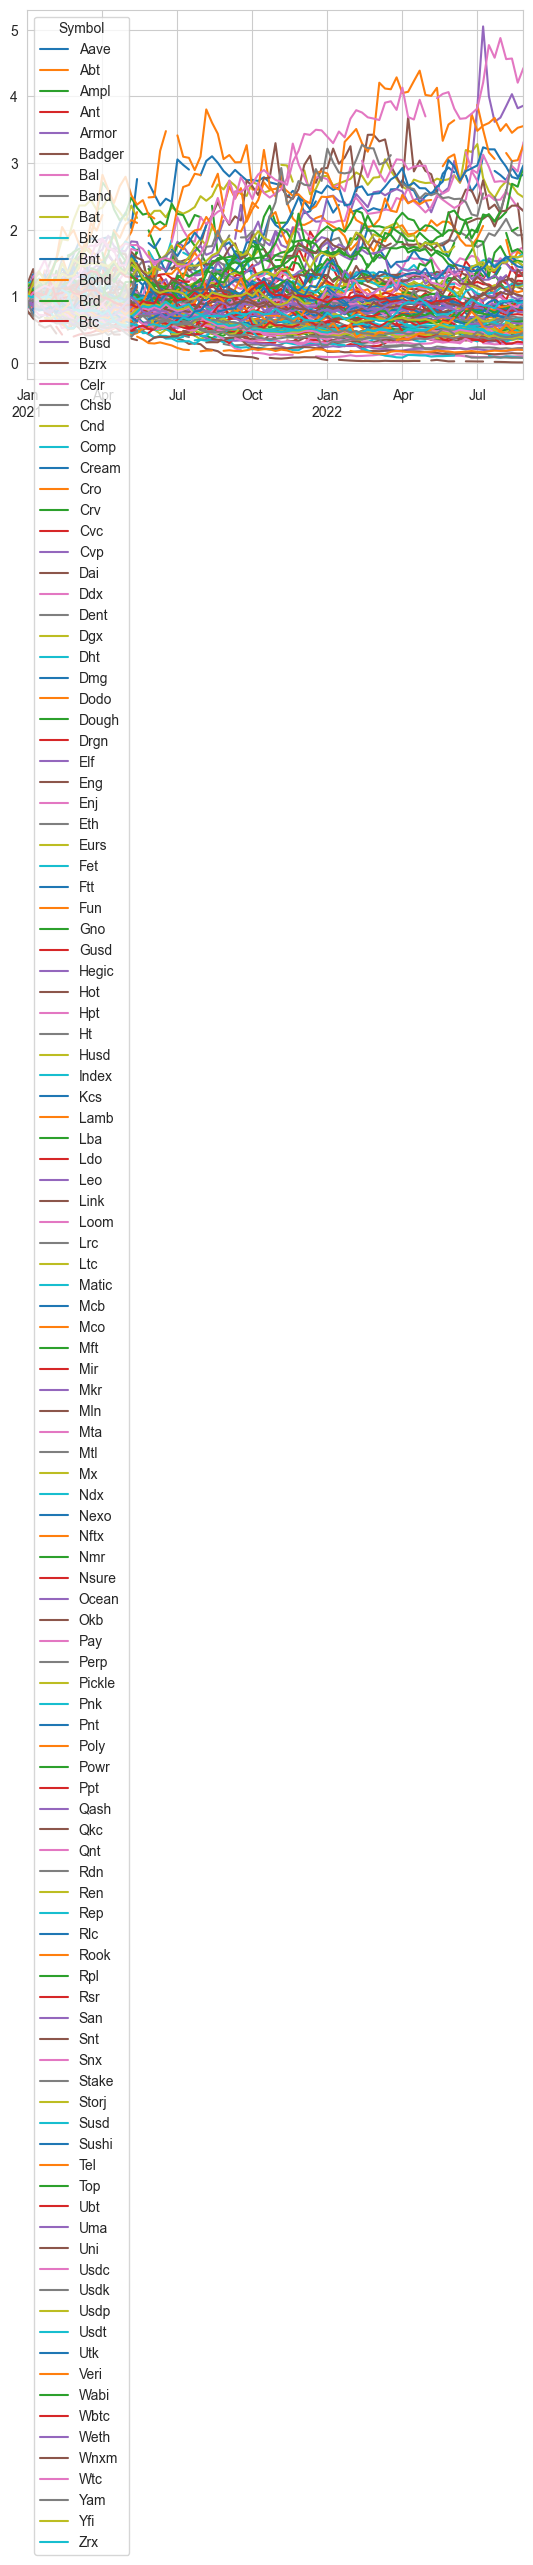

In [219]:
(1.0 + pd.DataFrame(resids).T).cumprod().plot()

In [224]:
pd.DataFrame(coefs).T.corr()

,LowVolatility,Momentum,Quality,Size,Value,Market
LowVolatility,1.000000,0.617001,-0.214281,-0.373699,-0.001108,-0.552399
Momentum,0.617001,1.000000,-0.172716,-0.379542,-0.254518,-0.359195
Quality,-0.214281,-0.172716,1.000000,-0.253778,-0.051284,0.266701
Size,-0.373699,-0.379542,-0.253778,1.000000,0.371198,0.242006
Value,-0.001108,-0.254518,-0.051284,0.371198,1.000000,0.114569
Market,-0.552399,-0.359195,0.266701,0.242006,0.114569,1.000000
